<b><font size=6>Содержание</font></b><a name="1common."></a>
* [0. Описание проекта](#0.)
* [1. Описание данных](#1.)
    * [1.1. Общая информация о пользователях](#1.1.)
    * [1.2. Общая информация о звонках](#1.2.)
    * [1.3. Общая информация о сообщениях](#1.3.)
    * [1.4. Общая информация об интернет-сессиях](#1.4.)
    * [1.5. Общая информация о тарифах](#1.5.)
* [2. Добавление новых данных](#2.)
    * [2.1. Кол-во звонков и общая продолжительность звонка в разбивке по месяцам](#2.1.)
    * [2.2. Кол-во отправленных сообщений по месяцам](#2.2.)
    * [2.3. Объем израсходованного интернет-трафика по месяцам](#2.3.)
    * [2.4. Помесячная выручка с каждого пользователя](#2.4.)
* [3. Анализ данных](#3.)
* [4. Проверка гипотез](#4.)
    * [4.1. Гипотеза о различии средней выручки для разных тарифов](#4.1.)
    * [4.2. Гипотеза о различии средней выручки для пользователей из Москвы и из других регионов](#4.2.)
* [5. Общий вывод](#5.)

<b><font size=5>Определение перспективного тарифа для телеком компании</font></b><a name="0."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

*Цель:* проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b><font size=3>Описание тарифов</font></b>

<b><font size=2>Тариф «Смарт»</font></b>
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
    
<b><font size=2>Тариф «Ультра»</font></b>
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей
    
<b><font size=2>Обратите внимание:</font></b> «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<b><font size=5>1. Описание данных</font></b><a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
# импорт всех необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

from termcolor import colored

import warnings
warnings.filterwarnings('ignore')

In [5]:
# загрузим все данные

users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv') # информация о пользователях
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv') # информация о звонках
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv') # информация о сообщениях
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv') # информация об интернет-сессиях
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv') # информация о тарифах

<b><font size=3>Описание данных:</font></b>

<b><font size=2>Таблица users</font></b> (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

<b><font size=2>Таблица calls</font></b> (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

<b><font size=2>Таблица messages</font></b> (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

<b><font size=2>Таблица internet</font></b> (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

<b><font size=2>Таблица tariffs</font></b> (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [6]:
def general_info(data):
    ''' 
    Функция принимает на вход датафрейм и возвращает общую информацию о данных.
    '''
    print('Случайные 5 строк датафрейма')
    print('----------------------------')
    display(data.sample(5, random_state=42)) # выводим на экран рандомные 5 строк датафрейма
    display(data.info())
    display(pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')) # выводим процент пропусков 
                                                                                                 # по каждому столбцу
    print('Описательная статистика')
    print('-----------------------')
    display(round(data.describe().T, 2))

Посмотрим более подробно общую информацию по каждой таблице.

<b><font size=4>1.1. Общая информация о пользователях</font></b><a name="1.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [7]:
general_info(users)

Случайные 5 строк датафрейма
----------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
361,1361,38,NaN,Екатеринбург,Рената,Кошелева,2018-09-09,ultra
73,1073,63,NaN,Владикавказ,Гордей,Павловский,2018-10-04,smart
374,1374,67,NaN,Махачкала,Леонид,Аркадьев,2018-04-01,smart
155,1155,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart
104,1104,60,NaN,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


None

,0
user_id,0
age,0
churn_date,92.4
city,0
first_name,0
last_name,0
reg_date,0
tariff,0


Описательная статистика
-----------------------


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.50,144.48,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.59,16.67,18.0,32.00,46.0,62.00,75.0


В таблице users в столбце churn_date (дата закрытия договора) 92% пропусков, что означает, что эти люди на момент выгрузки еще пользуются услугами данного оператора. Пока оставим этот столбец бех изменений. В описательной статистике показано, что минимальный возраст пользователей 18 лет, максимальный - 75, при этом средний возраст 47 лет.

Изменим типы данных, для уменьшения потребляемой памяти. Изменим тип object в столбце reg_date на тип datetime, а в столбце city на тип category.

In [8]:
def astype_columns(data):
    '''
    Функция меняет тип только столбцов с типами int и float на более подходящий (но занимающий меньший объем памяти).
    '''
    columns_int = data.select_dtypes(include=['int']).columns # выбираем из датасета все столбцы с типом int
    data.loc[:, columns_int] = data.loc[:, columns_int].apply(pd.to_numeric, downcast='integer') # меняем тип
    
    columns_float = data.select_dtypes(include=['float']).columns # аналогично, выбираем с типом float
    data.loc[:, columns_float] = data.loc[:, columns_float].apply(pd.to_numeric, downcast='float') # меняем тип
    

In [9]:
# изменим типы данных

astype_columns(users)
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['city'] = users['city'].astype('category')
users['tariff'] = users['tariff'].astype('category')

In [10]:
# проверка

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null category
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null category
dtypes: category(2), datetime64[ns](1), int64(2), object(3)
memory usage: 27.7+ KB


Объем потребляемой амяти уменьшился с 31.3 КВ до 27.7 КВ.

In [11]:
# проверка на дубликаты

users.duplicated().sum()

0

In [12]:
# посмотрим на кол-во городов, из которых наши пользователи

users['city'].value_counts()

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Екатеринбург        11
Ульяновск           11
Набережные Челны    11
Краснодар           11
Челябинск            9
Самара               9
Нижний Новгород      8
Пермь                8
Волгоград            8
Улан-Удэ             7
Красноярск           7
Вологда              7
Новокузнецк          7
Киров                6
Пенза                6
Ростов-на-Дону       6
Иркутск              6
Тюмень               6
Воронеж              6
Сочи                 6
Томск                6
Магнитогорск         5
Балашиха             5
Ставрополь           5
                    ..
Брянск               3
Ярославль            3
Стерлитамак          3
Череповец            3
Нижний Тагил         3
Якутск               3
Чебоксары            3
Орёл                 3
Тверь                3
Саратов              3
Севастополь          3
Курск                2
Белгород   

Всего 76 различных городов. Теперь посмотрим разбивку пользователей на два тарифа "смарт" и "ультра".

In [13]:
users['tariff'].value_counts(normalize=True)

smart    0.702
ultra    0.298
Name: tariff, dtype: float64

Видим, что пользователей c тарифом "Смарт" 70%, а с тарифом "ультра" 30%.

In [12]:
print('Минимальная дата заключения договора:', users['reg_date'].min())
print('Максимальная дата заключения договора:', users['reg_date'].max())

Минимальная дата заключения договора: 2018-01-01 00:00:00
Максимальная дата заключения договора: 2018-12-31 00:00:00


Получается, что у нас выборка клиентов, которые заключили договор в 2018г. И нам нужно проанализировать их активность также за 2018г. Стоит в дальнейшем учесть клиентов, которые подключились в конце 2018г, т.к. у них активность пользования тарифами может быть ниже, чем у тех кто подключился в начале года.

<b><font size=3>Вывод</font></b><br/>

Поменяли типы данных с столбцах с типами int и float на типы, которые потребляют меньше памяти. В столбце reg_date сменили тип с object на  datetime, в столбце city сменили тип с object на category.

Дубликатов не обнаружено.

Из 500 пользователей в выборке 70% - это пользователи тарифом "смарт", 30% - тарифом "ультра". Все пользователи подключились в 2018г. Из них на момент выгрузки данных 92% являются абонентами компании, 8% - отключили услуги компании.

<b><font size=4>1.2. Общая информация о звонках</font></b><a name="1.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [13]:
general_info(calls)

Случайные 5 строк датафрейма
----------------------------


,id,call_date,duration,user_id
158741,1392_406,2018-07-09,4.94,1392
95947,1244_202,2018-11-09,0.00,1244
10624,1027_494,2018-10-07,3.10,1027
167423,1412_340,2018-09-25,5.91,1412
73194,1184_168,2018-09-03,9.86,1184


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,0
id,0
call_date,0
duration,0
user_id,0


Пропусков нет, это радует! Проделаем тоже самое для таблицы calls: изменим типы данных, поищем дубликаты, проанализируем столбец duration (длительность звонка).



In [14]:
# изменяем типы данных

astype_columns(calls)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [15]:
# проверка

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float32
user_id      202607 non-null int16
dtypes: datetime64[ns](1), float32(1), int16(1), object(1)
memory usage: 4.3+ MB


In [16]:
# проверка на дубликаты

calls.duplicated().sum()

0

Дубликатов не найдено. А объем памяти уменьшился на 30%. Посмотрим какие значения может принимать столбец "длительность звонка".

In [17]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Есть звонки длительностью 0 минут, при этом 75% значений данных лежит в пределах длительности звонка до 10 минут. Посмотрим поближе на звонки длительностью 0 минут.

In [18]:
calls.loc[calls['duration'] == 0]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Звонки с длительностью 0 минут составляют 19.5% от всего датасета. Очень похоже, что это пропущенные звонки. Оставим их в таблице без изменений.

Посмотрим на минимальную и максималью даты звонка.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Согласен с решением.

</div>


In [19]:
print('Минимальная дата звонка:', calls['call_date'].min())
print('Максимальная дата звонка:', calls['call_date'].max())

Минимальная дата звонка: 2018-01-01 00:00:00
Максимальная дата звонка: 2018-12-31 00:00:00


С датами звонка все в порядке, они также в 2018г.

<b><font size=3>Вывод</font></b><br/>

Поменяли типы данных с столбцах с типами int и float на типы, которые потребляют меньше памяти. В столбце call_date сменили тип с object на  datetime.

Дубликатов и пропущенных значений не обнаружено.

Нашли звонки с длительностью 0 минут. Они составляют 19.5% от всего датасета. Очень похоже, что это пропущенные звонки. Оставили их в таблице без изменений. Все звонки в датасете были сделаны в 2018г.

<b><font size=4>1.3. Общая информация о сообщениях</font></b><a name="1.3."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [20]:
general_info(messages)

Случайные 5 строк датафрейма
----------------------------


,id,message_date,user_id
8581,1033_332,2018-11-08,1033
12476,1054_32,2018-08-10,1054
14805,1065_141,2018-05-29,1065
118278,1481_49,2018-05-24,1481
23803,1099_10,2018-08-24,1099


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,0
id,0
message_date,0
user_id,0


Пропущенных значений нет. Изменим типы данных, проверим данные на дубликаты, проанализируем дату сообщения.

In [21]:
astype_columns(messages)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [22]:
# проверка

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 2.1+ MB


Немного уменьшился объем потребляемой памяти, тип даты сообщения сменили с object на datetime. Посмотрим на максимальную и минимальную дату отправки сообщения.

In [23]:
print('Минимальная дата сообщения:', messages['message_date'].min())
print('Максимальная дата сообщения:', messages['message_date'].max())

Минимальная дата сообщения: 2018-01-02 00:00:00
Максимальная дата сообщения: 2018-12-31 00:00:00


In [24]:
# поиск дубликатов

messages.duplicated().sum()

0

<b><font size=3>Вывод</font></b><br/>

Поменяли типы данных с столбцах с типом int  на тип, который потребляет меньше памяти. В столбце message_date сменили тип с object на datetime.

Дубликатов и пропущенных значений не обнаружено.

Все сообщения были отправлены в 2018г.

<b><font size=4>1.4. Общая информация об интернет-сессиях</font></b><a name="1.4."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [25]:
general_info(internet)

Случайные 5 строк датафрейма
----------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
31737,31737,1110_331,351.71,2018-09-04,1110
31333,31333,1109_399,257.69,2018-06-09,1109
61121,61121,1207_191,128.18,2018-11-05,1207
71184,71184,1241_88,736.71,2018-11-23,1241
84394,84394,1286_76,900.69,2018-12-18,1286


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,0
Unnamed: 0,0
id,0
mb_used,0
session_date,0
user_id,0


Пропущенных значений нет. Изменим типы данных, аналогично как и в таблицах выше.

In [26]:
astype_columns(internet)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [27]:
# проверка 

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int32
id              149396 non-null object
mb_used         149396 non-null float32
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int16
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1), object(1)
memory usage: 3.7+ MB


Уменьшился объем потребляемой памяти, тип даты сессии сменили с object на datetime. Посмотрим на максимальную и минимальную дату сессии.

In [28]:
print('Минимальная дата сессии:', internet['session_date'].min())
print('Максимальная дата сессии:', internet['session_date'].max())

Минимальная дата сессии: 2018-01-01 00:00:00
Максимальная дата сессии: 2018-12-31 00:00:00


In [29]:
# поиск дубликатов

internet.duplicated().sum()

0

In [30]:
# посмотрим на статистики по столбцу "объём потраченного за сессию интернет-трафика"

internet['mb_used'].describe()

count    149396.000000
mean        370.192444
std         278.300964
min           0.000000
25%         138.187496
50%         348.014999
75%         559.552490
max        1724.829956
Name: mb_used, dtype: float64

Есть интрнет-сессии с нулевым объемом трафика. Посмотрим на них поближе.

In [31]:
internet.loc[internet['mb_used'] == 0]

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Всего 13% нулевых сессий от общего датасета. Если бы была длительность сессии, то можно было бы проанализировать ее. Возможно объем, потраченного за сессию интернет-трафика нулевой в том случае, если абонент заходил на странички с безлимитным использованием трафика (например, соц.сети, вотсап и пр.) и объем трафика на этих страницах не учитывается. Хотя в описании тарифа таких условий не прописано. Оставим этот столбец без изменений.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Молодец, что заметила и такие интернет-сессии.

</div>


<b><font size=3>Вывод</font></b><br/>

Поменяли типы данных с столбцах с типами int и float на типы, которые потребляют меньше памяти. В столбце session_date сменили тип с object на datetime.

Дубликатов и пропущенных значений не обнаружено.

Все сессии были сделаны в 2018г.

13% сессий в датасете имеют нулевой объемпотраченного трафика. Возможно объем, потраченного за сессию интернет-трафика нулевой в том случае, если абонент заходил на странички с безлимитным использованием трафика (например, соц.сети, вотсап и пр.) и объем трафика на этих страницах не учитывается.

<b><font size=4>1.5. Общая информация о тарифах</font></b><a name="1.5."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [32]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tariffs хранится общая информация о тарифах, которая была описана в п.0.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличный первый взгляд на сырые данные. Здорово, что не забыла проверить на дубликаты.

</div>


<b><font size=5>2. Добавление новых данных</font></b><a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

<b><font size=4>2.1. Кол-во звонков и общая продолжительность звонка в разбивке по месяцам</font></b><a name="2.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [33]:
# добавим в таблицу о звонках новый столбец - номер месяца, в который был сделан звонок

calls['month'] = calls['call_date'].dt.month

In [34]:
# округлим вверх длительность звонка, т.к. по условию оператора он округляет каждый отдельно взятый звонок вверх

calls['duration'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Обрати внимание, что согласно условиям оператора он округляет каждый отдельно взятый звонок и интернет-сессию вверх вверх. Добавь этот шаг перед группировками, пожалуйста.

</div>



<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Добавила округление вверх длительности звонка. Длительность интернет-сессий округляю в п.2.3
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Отлично.

</div>


In [35]:
# посчитаем кол-во сделанных звонков и суммарную продолжительность звонков для каждого пользователя в разбивке по месяцам
calls_pivot = calls.pivot_table(index=['user_id', 'month'],
                                values='duration',
                                aggfunc=('count', 'sum')).fillna(0)

# переименуем столбцы
calls_pivot.columns = ['calls_count', 'calls_duration']


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Только не "среднюю продолжительность", а суммарную за каждый месяц :) ✔

</div>


In [36]:
# посмотрим на получившуюся таблицу

calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

Создали таблицу calls_pivot с информацией по каждому пользователю о кол-ве сделанных звонков и общей продолжительности звонка в разбивке по месяцам. Проделаем тоже самое для таблиц с сообщениями и интернет сессиями.

<b><font size=4>2.2. Кол-во отправленных сообщений по месяцам</font></b><a name="2.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [37]:
# добавим в таблицу о сообщениях новый столбец - номер месяца, в который был сделан звонок

messages['month'] = messages['message_date'].dt.month

In [38]:
# посчитаем кол-во отправленных сообщений по месяцам для каждого пользователя
messages_pivot = messages.pivot_table(index=['user_id', 'month'],
                                      values='id',
                                      aggfunc='count')

# переименуем столбцы
messages_pivot.columns = ['messages_count']

In [39]:
# посмотрим на получившуюся таблицу

messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

<b><font size=3>Вывод</font></b><br/>

Создали таблицу messages_pivot_full с информацией по каждому пользователю о кол-ве отправленных сообщений в разбивке по месяцам. 

<b><font size=4>2.3. Объем израсходованного интернет-трафика по месяцам</font></b><a name="2.3."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [40]:
# добавим в таблицу о сообщениях новый столбец - номер месяца, в который был сделан звонок

internet['month'] = internet['session_date'].dt.month

In [41]:
# округлим вверх объем интернет-трафика, 
# т.к. по условию оператора он округляет каждую отдельно взятую интернет-сессию вверх

internet['mb_used'] = np.ceil(internet['mb_used'])

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Напоминаю про округление интернет сессий 😉

</div>


<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Добавила округление вверх интернет-сессий.
    
</div>

In [42]:
# посчитаем объем израсходонного интернет-трафика по месяцам для каждого пользователя
internet_pivot = internet.pivot_table(index=['user_id', 'month'],
                                      values='mb_used',
                                      aggfunc='sum')

# переименуем столбцы
internet_pivot.columns = ['mb_used_sum']

In [43]:
# посмотрим на получившуюся таблицу

internet_pivot.head()

mb_used_sum
user_id month             
1000    5           2256.0
        6          23257.0
        7          14016.0
        8          14070.0
        9          14581.0

<b><font size=3>Вывод</font></b><br/>

Создали таблицу internet_pivot с информацией по каждому пользователю об объеме интернет-сессий в разбивке по месяцам. Теперь соединим все таблицы в одну общую и добавим данные о тарифе. Затем посчитаем помесячную выручку.

<b><font size=4>2.4. Помесячная выручка с каждого пользователя</font></b><a name="2.4."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [44]:
#соединим сводные таблицы по звонкам и сообщениям

calls_messages = calls_pivot.join(messages_pivot, how='outer')

In [45]:
# теперь присоединим еще и таблицу по интернет-трафику

calls_messages_internet = calls_messages.join(internet_pivot, how='outer')

In [46]:
# посмотрим на полученную таблицу

calls_messages_internet

calls_count  calls_duration  messages_count  mb_used_sum
user_id month                                                          
1000    5             22.0           159.0            22.0       2256.0
        6             43.0           172.0            60.0      23257.0
        7             47.0           340.0            75.0      14016.0
        8             52.0           408.0            81.0      14070.0
        9             58.0           466.0            57.0      14581.0
...                    ...             ...             ...          ...
1498    10            41.0           247.0            42.0      20604.0
1499    9              9.0            70.0            11.0       1848.0
        10            68.0           449.0            48.0      17809.0
        11            74.0           612.0            59.0      17984.0
        12            69.0           492.0            66.0      13077.0

[3214 rows x 4 columns]

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>По умолчанию у join стоит тип объединения left. Из-за этого теряется небольшое количество строк. Подумай, какой тип объединения здесь подходит больше.

</div>


<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Спасибо большое! Я как-то не подумала до объединения, что в таблице calls могут быть абоненты, которые не пишут сообщений или не пользуются интернетом! Исправила, добавив параметр how='outer'.
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Вот, теперь все абсолютно верно :)

</div>


In [47]:
# присоединим данные о тарифах пользователей
pivot_table_temp = calls_messages_internet.join(users.loc[:, ['user_id', 'tariff', 'city']].set_index('user_id'))

# присоединим информацию о каждом тарифе
df_with_tariffs = (
    pivot_table_temp
    .reset_index()
    .merge(tariffs, left_on='tariff', right_on='tariff_name')
    .drop('tariff', axis=1)
)

In [48]:
# проверка на пустые значения

df_with_tariffs.isna().sum()

user_id                    0
month                      0
calls_count               40
calls_duration            40
messages_count           497
mb_used_sum               11
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
dtype: int64

Есть пользователи, которые не отправляли сообщения, есть которые не пользовались интернетом или не совершали звонков. Заполним тогда эти значения нулями.

In [49]:
# заполним пропуски нулями

df_with_tariffs['calls_count'] = df_with_tariffs['calls_count'].fillna(0)
df_with_tariffs['calls_duration'] = df_with_tariffs['calls_duration'].fillna(0)
df_with_tariffs['messages_count'] = df_with_tariffs['messages_count'].fillna(0)
df_with_tariffs['mb_used_sum'] = df_with_tariffs['mb_used_sum'].fillna(0)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Решение логичное и правильное.

</div>


In [50]:
# посмотрим на итоговую таблицу

df_with_tariffs.head(10)

,user_id,month,calls_count,calls_duration,messages_count,mb_used_sum,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,57.0,350.0,73.0,14717.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,43.0,338.0,58.0,14768.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,46.0,333.0,70.0,9827.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra
8,1003,8,55.0,380.0,37.0,8571.0,Москва,1000,30720,3000,1950,150,1,1,ultra
9,1003,9,134.0,961.0,91.0,12479.0,Москва,1000,30720,3000,1950,150,1,1,ultra


Теперь посчитаем выручку от каждого пользователя в разбивке по месяцам. Сначала посчитаем отдельно сколько пользователь платит за звонки, отдельно за сообщения и отдельно за интернет.

<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> В ячейки ниже, при подсчете выручки, убрала округление вверх, т.к. сделала это ранее.
    
</div>

In [51]:
# сумма платы за звонки в месяц = max(использованные_минуты - минуты_в_пакете, 0) * цена_за_минуту

receipts_calls = (
    np.maximum(df_with_tariffs['calls_duration'] - df_with_tariffs['minutes_included'], 0) 
    * df_with_tariffs['rub_per_minute'])


# тоже для сообщений

receipts_messages = (
    np.maximum(df_with_tariffs['messages_count'] - df_with_tariffs['messages_included'], 0) 
    * df_with_tariffs['rub_per_message'])


# тоже для интернет-сессий

receipts_internet = (
    np.maximum(df_with_tariffs['mb_used_sum'] - df_with_tariffs['mb_per_month_included'], 0) 
    * df_with_tariffs['rub_per_gb'] / 1024)


In [52]:
# считаем общую выручку 
df_with_tariffs['receipts'] = round(df_with_tariffs['rub_monthly_fee'] 
                                    + receipts_calls 
                                    + receipts_messages 
                                    + receipts_internet, 2)

In [53]:
# посмотрим на итоговую таблицу

df_with_tariffs

,user_id,month,calls_count,calls_duration,messages_count,mb_used_sum,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,receipts
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.00
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.00
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.00
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.00
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20604.0,Владикавказ,50,15360,500,550,200,3,3,smart,1574.22
3210,1499,9,9.0,70.0,11.0,1848.0,Пермь,50,15360,500,550,200,3,3,smart,550.00
3211,1499,10,68.0,449.0,48.0,17809.0,Пермь,50,15360,500,550,200,3,3,smart,1028.32
3212,1499,11,74.0,612.0,59.0,17984.0,Пермь,50,15360,500,550,200,3,3,smart,1425.50


<b><font size=3>Вывод</font></b><br/>

Добавили в общую таблицу помесячную выручку с каждого пользователя. Вычли бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножили на значение из тарифного плана; прибавили абонентскую плату, соответствующую тарифному плану.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Выручка расчитана верно!

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Только для выручки больше подходит целочисленный формат данных (или с двумя знаками после запятой). ✔

</div>


<b><font size=5>3. Анализ данных</font></b><a name="3."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы.

In [55]:
df_with_tariffs.groupby('tariff_name')['calls_count', 
                                       'calls_duration', 
                                       'messages_count', 
                                       'mb_used_sum'].agg(['mean', np.var, 'std']).round()

calls_count               calls_duration                   \
                   mean     var   std           mean       var    std   
tariff_name                                                             
smart              58.0   673.0  26.0          418.0   36219.0  190.0   
ultra              73.0  1929.0  44.0          527.0  100874.0  318.0   

            messages_count               mb_used_sum                        
                      mean     var   std        mean          var      std  
tariff_name                                                                 
smart                 33.0   797.0  28.0     16229.0   34545912.0   5878.0  
ultra                 49.0  2285.0  48.0     19487.0  101935624.0  10096.0

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Обрати внимание, что ты расчитала не минуты, а количество звонков в месяц. Нас больше интересует столбец calls_duration. Так как по количеству звонков у нас ограничений нет. Измени, пожалуйста, это и в графиках ниже. Или добавь еще один, как раз место осталось :)

</div>


<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Исправляюсь!) Добавила еще график по суммарной продолжительности звонка и строчку в выводе об этом.
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Все здорово. Таблицу выше можно было округлить до пары знаков после запятой, возможно, читаемость бы повысилась, тем более много знаков после запятой нам не сильно интересны.

</div>



Видим, что в среднем на тарифе "ультра" пользователи тратят в 1.3 раза больше минут для разговора, сообщений и трафика. При этом стандартное отклонение на тарифе "ультра" в среднем в 1.6 раз больше, чем у тарифа "смарт".

Посмотрим на гистограммы по каждому столбцу.

In [56]:
tariff_smart = df_with_tariffs.loc[df_with_tariffs['tariff_name'] == 'smart'] # пользователи с тарифом 'смарт'

tariff_ultra = df_with_tariffs.loc[df_with_tariffs['tariff_name'] == 'ultra'] # пользователи с тарифом 'ультра'

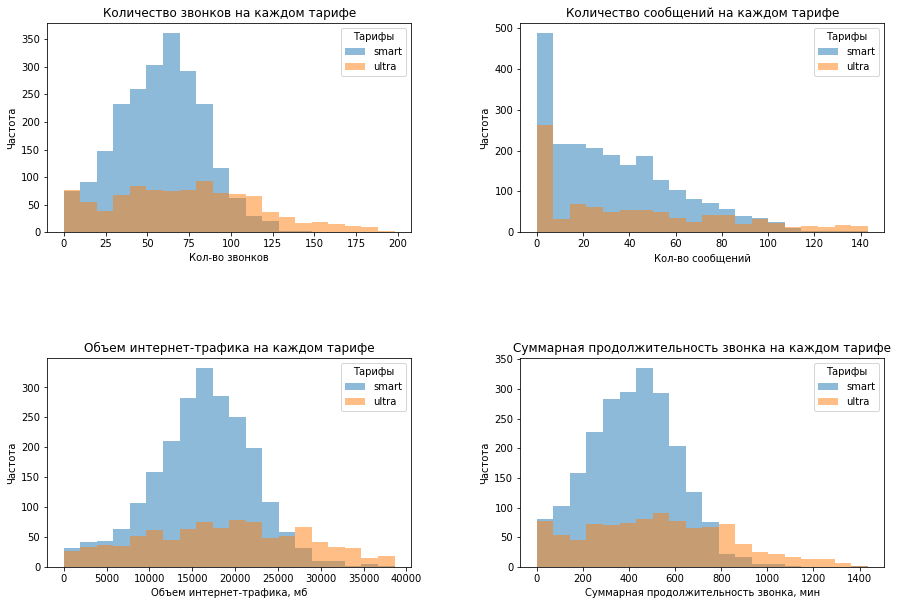

In [57]:
# построим гистограммы для кол-ва звонков, сообщений и интернета по каждому тарифу

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0,0].set_xlabel('Кол-во звонков')
axes[0,0].set_ylabel('Частота')
axes[0,0].set_title('Количество звонков на каждом тарифе')
_, bins, _ = axes[0,0].hist(tariff_smart['calls_count'], 
                            bins=20, 
                            alpha=0.5, 
                            label = 'smart')
axes[0,0].hist(tariff_ultra['calls_count'],
              bins=bins,
              alpha=0.5,
              label = 'ultra')
axes[0,0].legend(title="Тарифы")


axes[0,1].set_xlabel('Кол-во сообщений')
axes[0,1].set_ylabel('Частота')
axes[0,1].set_title('Количество сообщений на каждом тарифе')
_, bins, _ = axes[0,1].hist(tariff_smart['messages_count'], 
                            bins=20, 
                            alpha=0.5, 
                            label = 'smart')
axes[0,1].hist(tariff_ultra['messages_count'],
              bins=bins,
              alpha=0.5,
              label = 'ultra')
axes[0,1].legend(title="Тарифы")


axes[1,0].set_xlabel('Объем интернет-трафика, мб')
axes[1,0].set_ylabel('Частота')
axes[1,0].set_title('Объем интернет-трафика на каждом тарифе')
_, bins, _ = axes[1,0].hist(tariff_smart['mb_used_sum'], 
                            bins=20, 
                            alpha=0.5, 
                            label = 'smart')
axes[1,0].hist(tariff_ultra['mb_used_sum'],
              bins=bins,
              alpha=0.5,
              label = 'ultra')
axes[1,0].legend(title="Тарифы")

axes[1,1].set_xlabel('Суммарная продолжительность звонка, мин')
axes[1,1].set_ylabel('Частота')
axes[1,1].set_title('Суммарная продолжительность звонка на каждом тарифе')
_, bins, _ = axes[1,1].hist(tariff_smart['calls_duration'], 
                            bins=20, 
                            alpha=0.5, 
                            label = 'smart')
axes[1,1].hist(tariff_ultra['calls_duration'],
              bins=bins,
              alpha=0.5,
              label = 'ultra')
axes[1,1].legend(title="Тарифы")

plt.subplots_adjust(wspace=0.3, hspace=0.6) # задаем отступы
plt.show()

*Кол-во звонков:*

Имеет нормальное распределение по обоим тарифам. У распределения тарифа "ультра" длинный правый хвост. 
Видим, что до 100 звонков в месяц гораздо больше у пользователей тарифа "смарт". Но более 100 звонков в месяц уже у пользователей тарифом "ультра". Более 150 звонков в месяц у пользователей тарифом "смарт" уже практически нет.


*Кол-во сообщений:*

Распределение смещено влево.
Аналогично, до 100 сообщений в основном пишут на тарифе "смарт". А если сообщений написано более 100-115, то тут уже преобладает тариф "ультра". По гистограмме видно, что мало людей пишут много сообщений. Это и понятно, есть же соц.сети=)


*Объем интернет-трафика:*

Имеет нормальное распределение по обоим тарифам.
До 25000мб используют в основном на тарифе "смарт",после 30000мб в основном используют на тарифе "ультра". На обоих тарифах используют одинаково мало трафика до 5000мб.


*Суммарная продолжительность звонка*

Имеет нормальное распределение с длинным правым хвостом. Это означает, что 800 мин в месяц и более разговаривают на тарифе "ультра". По тарифу "смарт" таких больших значений практически нет.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отлично выполненный шаг.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также в качестве дополнения шага могу посоветовать проанилизировать выручку, построить графики, найти общие выручки по тарифам за год - не повлияют ли эти данные на общие выводы?

</div>


<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Ниже добавила анализ выручки по каждому тарифу.
    
</div>

Проанализируем выручку по каждому тарифу. Построим гистограммы.

In [58]:
# рассчет средней месячной выручке для каждого тарифа

df_with_tariffs.groupby('tariff_name')['receipts'].mean()

tariff_name
smart    1233.349412
ultra    2060.530000
Name: receipts, dtype: float64

Для данной выборке из 500 пользователей средняя ежемесячная выручка на тарифе "ультра" почти в два раза выше. Посмотрим на распределение выручки по каждому тарифу.

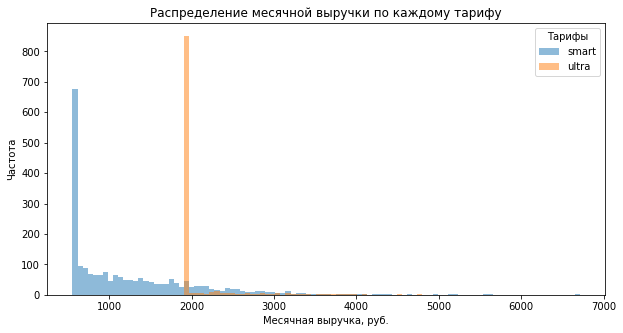

In [59]:
plt.figure(figsize =(10, 5))

_, bins, _ = plt.hist(tariff_smart['receipts'],
        bins=100,
        alpha=0.5,
        label='smart')
plt.xlabel('Месячная выручка, руб.')
plt.ylabel('Частота')

plt.hist(tariff_ultra['receipts'],
        bins=bins,
        alpha=0.5,
        label='ultra')
plt.xlabel('Месячная выручка, руб.')
plt.ylabel('Частота')

plt.title('Распределение месячной выручки по каждому тарифу')
plt.legend(title="Тарифы")
plt.show()

Видим, что у тарифа "смарт" в основном выручка от 500 до 3000 руб в месяц, при этом у тарифа "ультра" выручка выше и начинается от 2000руб. Это и понятно, т.к. тариф ультра стоит 1950руб.

In [60]:
print('Максимальная месячная выручка на тарифе смарт:', tariff_smart['receipts'].max())
print('Максимальная месячная выручка на тарифе ультра:', tariff_ultra['receipts'].max())
       

Максимальная месячная выручка на тарифе смарт: 6711.02
Максимальная месячная выручка на тарифе ультра: 4743.31


Интересно, что на тарифе "смарт" максимальная выручка больше. По гистограмме видно, что это единичные случаи.

<b><font size=3>Вывод</font></b><br/>

По всем четырем параметрам: кол-во звонков, кол-во сообщений и объем интернет-трафика, суммарная продолжительность звонков в месяц среднее зачение выше примерно в 1,5 раза у тарифа "ультра". Тоже самое и со стандартным отклонение. Разброс значений у тарифа "ультра" также больше.

По гистограммам увидели, что на тарифе "ультра" больше пользователей, которые много звонят(от 100 звонков в месяц), пишут много сообщений (от 100-115), имеют продолжительность звонка от 800 минут и выше и больше пользуются интернетом. Но при этом, на тарифе "смарт" в общем больше пользователей.

По распределению выручки увидели, что у тарифа "смарт" в основном выручка от 500 до 3000 руб в месяц, при этом у тарифа "ультра" выручка выше и начинается от 2000руб. При этом на тарифе "смарт" максимальная выручка больше.

*Гипотеза:* тариф "ультра" приносит больше денег. Проверим эту гипотезу в сл.блоке.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Шаг отлично дополнен.

</div>


<b><font size=5>4. Проверка гипотез</font></b><a name="4."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

<b><font size=4>4.1. Гипотеза о различии средней выручки для разных тарифов</font></b><a name="4.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Для начала проверим одинаковые ли дисперсии у выборок, применив тест Левена. <br/>
Гипотеза $H_0$: Дисперсии выручки для тарифа смарт и ультра равны.<br/>
Гипотеза $H_1$: Дисперсии выручки для тарифа смарт и ультра не равны.

Затем проверим равенство средних выручек у двух тарифов. <br/>
Сформулируем <b>нулевую гипотезу:</b> *средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличается.* <br/>
<b>Альтернативная гипотеза:</b> *средняя выручка пользователей тарифов «Ультра» и «Смарт» отличается.*

И займем статистической проверкой гипотез.


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также было бы здорово сформулировать и альтернативную гипотезу тоже. ✔

</div>


In [61]:
# создадим series по выручке для каждого тарифа

receipts_smart = df_with_tariffs.loc[df_with_tariffs['tariff_name'] == 'smart', 'receipts']
receipts_ultra = df_with_tariffs.loc[df_with_tariffs['tariff_name'] == 'ultra', 'receipts']

<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Ниже добавила тест Левена про проверку равенства дисперсий и обернула два теста в функцию, т.к. использую эти два теста для разных выборок два раза.
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Молодец, что освоила и применила тест Левена!

</div>


In [62]:
def equal_means(a,b, alpha = 0.05):
    
    '''Функция сначала применяет тест Левена к двум выборка для проверки равенства дисперсий.
    Затем исходя из равенства/различия дисперсий применяет к этим выборкам t-test.
    '''
    
    results_levene = st.levene(a, b) # применяем тест Левена для проверки равенства дисперсий
    print('p-значение:', results_levene.pvalue)
    
    if results_levene.pvalue < alpha:
        print(colored("Отвергаем нулевую гипотезу (о дисперсии)", 'red'))
        equal_var = False # дисперсии выборок не равны
    else: 
        print(colored("Не можем отвергнуть нулевую гипотезу (о дисперсии)", 'green'))
        equal_var = True # дисперсии выборок равны
        
    # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
    results = st.ttest_ind(a, b, equal_var=equal_var) 
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha:
        print(colored("Отвергаем нулевую гипотезу", 'red'))
    else: 
        print(colored("Не можем отвергнуть нулевую гипотезу", 'green'))

In [63]:
# применяем написанную функцию к выборкам по двум тарифам

equal_means(receipts_smart, receipts_ultra, alpha = 0.05)

p-значение: 3.135578626683539e-115
Отвергаем нулевую гипотезу (о дисперсии)
p-значение: 8.930336877790439e-296
Отвергаем нулевую гипотезу


Согласно тесту Левена дисперсии выборок разные. Это учитываем при проведении t-теста.<br/>
По t-тесту нулевую гипотезу о равенстве средних выручек по двум тарифам отвергаем. Значит средняя выручка по каждому тарифу существенно отличается.

<b><font size=3>Вывод</font></b><br/>

Для сравнения выручки по каждому тарифу воспользовались тестом st.ttest_ind, который проверяет гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Согласно тесту средняя выручка по каждому тарифу отличается.
Ранее считали и увидели, что средняя ежемесячная выручка на тарифе "ультра" почти в два раза выше по данным из конкретной выборки.

Гипотеза в выводе п.3 не отвергнута.

<b><font size=4>4.2. Гипотеза о различии средней выручки для пользователей из Москвы и из других регионов</font></b><a name="4.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)


In [64]:
receipts_moscow = df_with_tariffs.loc[df_with_tariffs['city'] == 'Москва', 'receipts'] # пользователи из Москвы

receipts_region = df_with_tariffs.loc[df_with_tariffs['city'] != 'Москва', 'receipts'] # пользователи из регионов

In [65]:
print('Средняя месячная выручка для пользователей из Москвы', receipts_moscow.mean())

print('Средняя месячная выручка для пользователей из регионов', receipts_region.mean())

Средняя месячная выручка для пользователей из Москвы 1507.2766939443536
Средняя месячная выручка для пользователей из регионов 1482.0637072608529


Если просто посчитать среднее значение выручки, то они не так уж и различны для Москвы и регионов. Посмотрим что скажет тест.

<b>Нулевая гипотеза:</b> средняя выручка у пользователей из Москвы и из регионов не отличается.<br/>
<b>Альтернативная гипотеза:</b> средняя выручка у пользователей из Москвы и из регионов отличается.<br/>

In [66]:
# считаем два теста: Левена и t-тест

equal_means(receipts_moscow, receipts_region, alpha = 0.05)

p-значение: 0.021465924014568014
Отвергаем нулевую гипотезу (о дисперсии)
p-значение: 0.4549784322403716
Не можем отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть. Полученное значение p-value говорит о том, что хотя средняя выручка и отличается для жителей из Москвы и из регинов, с вероятностью в 45% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

<b><font size=3>Вывод</font></b><br/>

Для сравнения выручки по каждому тарифу воспользовались тестом st.ttest_ind, который проверяет гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Согласно тесту средняя выручка для Москвы и регионов не отличается. В 45% случаев различие можно получить случайно.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Гипотезы сформулированы грамотно, результаты тестов интерпретированы верно!

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b> 
    
Также здесь у меня есть небольшое замечание по поводу выбора `equal_var = False` или `equal_var = True`. Перед проведением проверки гипотез через T-критерий Стьюдента нужно сравнить дисперсии двух выборок отдельно, и если они различаются значимо отличаются, выбираем `equal_var = False`. Это является важным критерием при проверке сборного проекта, но и в этой работе тоже стоит добавить этот шаг. Также прикладываю [ссылку](http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-indep.html) с интересным материалом по поводу проверки дисперсий и нормальности распределений (однако проверка нормальности выходит за рамки нашего курса, поэтому ее делать не нужно, это скорее для общего понимания требований к тесту) с кодом. По ссылке также есть информация, что выборки должны быть одной длины. Однако, полазив по сайтам и почитав теорию, я не нашел слов о такой необходимости. Везде есть только информация про нормальность и дисперсии.

По ссылке  используется [тест Левена](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) перед проведением Т-теста. В некоторых статистических пакетах ([ссылка](https://habr.com/ru/sandbox/30391/) в качестве подтверждения моих слов) при проведении т-теста автоматически проводится тест Левена и на его основе выбирается параметр `equal_var`. В нашем случае приходится такое проделывать руками. Также есть и другие тесты для сравнения дисперсий, однако тест Левена является одним из наиболее универсальных для разных типов распределений.
    
Кстати, хочу поделиться еще одной ссылкой. Это [т-тест из другой библиотеки](https://pingouin-stats.org/generated/pingouin.ttest.html) с автоматической проверкой дисперсий (правда там немного другая логика по этому параметру, на сайте есть ссылки на теорию по этому поводу). Достаточно удобный инструмент.

PS На счет нормальности. Это довольно интересный момент. Во всей информации про тест Стьюдента нормальность распределения приводится как требование. Однако, нормальность должна соблюдаться при малом количестве наблюдений в каждой выборке (до 30-40). От 50 же значений нормальность для сравнения средних значений совокупностей не играет важной роли. Здесь вступает в силу центральная предельная теорема. По данной [ссылке](https://statanaliz.info/statistica/proverka-gipotez/raspredelenie-t-kriteriya-styudenta-dlya-proverki-gipotezy-i-rascheta-doveritelnogo-intervala-v-ms-excel/) есть интересная фраза "Таким образом, ненормальность распределения – это, конечно, нехорошо, но некритично." Также по [ссылке](https://drive.google.com/file/d/1SqcimkyF4iGjgT8Yhlmx-tOXV-ejmFev/view) еще один интересный материал с примерами про нормальность (на русском).
</div>


<div class="alert alert-block alert-info">    
<b>Комментарий от студента:</b> Спасибо большое за подробное объяснение и много полезных ссылок! По поводу размера выборок уточнила у Александра Сушкова. Он сказал, что тест Стьюдента сам знает сколько ему взять для сравнения случайных средних. Если бы выборки были зависимы (типа было-стало) - тогда да, а так - нет. Тоже самое по этому поводу говорит Екатерина Горленко в вебинаре.
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Рад, если смог подсказать что-то полезное 😊

</div>


<b><font size=5>5. Общий вывод</font></b><a name="5."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

<b>Изучив данные 500 пользователей «Мегалайна» были сделаны сл.выводы:</b>

* Из 500 пользователей в выборке 70% - это пользователи тарифом "смарт", 30% - тарифом "ультра". Все пользователи подключились в 2018г. Из них на момент выгрузки данных 92% являются абонентами компании, 8% - отключили услуги компании.

* В среднем на тарифе "ультра" пользователи тратят в 1.3 раза больше минут для разговора, сообщений и трафика.

* На тарифе "ультра" больше пользователей, которые много звонят(от 100 звонков в месяц), пишут много сообщений (от 100-115), разговаривают от 800 минут в месяц и больше пользуются интернетом. Но при этом, на тарифе "смарт" в общем больше пользователей с меньшим кол-вом звонков, сообщений и интернета.

<b>Было проверено две гипотезы:</b>

1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличается. Эта гипотеза была отвергнута по результатам t-теста. Средняя выручка на тарифах существенно различается. Посчитав среднюю выручку по каждому тарифу по данным 500 пользователей увидели, что у тарифа "ультра" выручка почти в 2 раза выше.

2) Средняя выручка у пользователей из Москвы и из регионов не отличается. Гипотеза не отвергнута. Согласно тесту средняя выручка для Москвы и регионов не отличается. В 33% случаев различие можно получить случайно.

<b>Была продела сл.работа с данными:</b>

* Во многих столбцах изменены типы данных на соответствующие данным в столбце и для того, чтобы снизить потребление памяти.
* Добавлены новые данные в разбивке по месяцам: кол-во звонков, сообщений, объем интернет-трафика, выручка по каждому пользователю.

<b>Рекоменации:</b>

В результате анализа двух тарифов было выяснено, что тариф "ультра" приносит больше денег компании. В связи с этим рекомендуется скорректировать рекламный бюджет в пользу тарифа "ультра" в 2019г.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Общий вывод хороший.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также стоит четко ответить на вопрос - какой тариф лучше, либо же другими словами, какой тариф приносит больше денег компании.✔

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также было бы здорово добавить также рекомендацию - на какой их тарифов сделать упор в рекламной кампании на 2019 год.✔

</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>
